# clustering



<div dir = "rtl" style="direction:rtl;line-height:250%;">
	<font face="XB Zar" size=5>
در این بخش مانند بخش ای که در کلاس زده شد هر دو ویژگی دیتا ست را با الگوریتم kmeans خوشه بندی میکنیم سپس با الگوریتم kmodes سه خوشه جدید به دست آمده را به کلاس های نهایی نسبت میدهیم و در ستون جدید به دیتا ست اضافه میکنیم.
     </font>
</div>

In [1]:
!pip install kmodes
# pandas, numpy, sklearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes

In [3]:
df = pd.read_csv("dataset.csv")

effort_clustering = KMeans(n_clusters=2, random_state=0).fit(df[['time_online', 'video_clicks']])
df['effort'] = effort_clustering.labels_

proactivity_clustering = KMeans(n_clusters=2, random_state=0).fit(df[['content_anticipation', 'delay_lectures']])
df['proactivity'] = proactivity_clustering.labels_

control_clustering = KMeans(n_clusters=2, random_state=0).fit(df[['fraction_spent']])
df['control'] = control_clustering.labels_

df.to_csv("dataset_clustered.csv", index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [4]:
k_modes = KModes(n_clusters=4)
clusters = k_modes.fit_predict(df[['effort', 'proactivity', 'control']])
df['profile'] = clusters
df.to_csv("dataset_clustered.csv", index=False)

# neural network (normal featurs)

<div dir = "rtl" style="direction:rtl;line-height:250%;">
	<font face="XB Zar" size=5>
      در این بخش با استفاده از شبکه عصبی سه لایه که لایه های آن در قسمت init تعیین شده است برای پیش بینی نمره دانش آموزان یک شبکه عصبی طراحی کرده و سپس در 10000 ایتریشن وزن های این شبکه عصبی را با الگوریتم gradient descent تعیین میکنیم و در آخر روی دیتا ست تست که دو دهم دیتا ست اولیه بود و از آن در فرایند یادگیری استفاده نکردیم به داده ها بر چسب میدهیم.
     </font>
</div>

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features = df[["time_online", "video_clicks", "content_anticipation", "delay_lectures", "fraction_spent"]].values
target = df['grade'].values

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train).unsqueeze(1)
X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test).unsqueeze(1)

class Net(nn.Module):
    def __init__(self, input_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, 10)
        self.fc2 = nn.Linear(10, 8)
        self.fc3 = nn.Linear(8, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

input_size = features.shape[1]
model = Net(input_size)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

for i in range(10000):
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

<div dir = "rtl" style="direction:rtl;line-height:250%;">
	<font face="XB Zar" size=5>
همانطور که در سل پایین میبینید loss برابر مقدار زیر شد که این یعنی مقداری از  پیش بینی ها از مقدار واقعی دور بوده و خطا داشته ایم یعنی به طور متوسط مربع فاصله ما از مفدار واقعی به این اندازه اختلاف داشته است در مرحله بعدی این مقدار را سعی میکنیم کمتر کنیم.
     </font>
</div>

In [6]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    mse = F.mse_loss(y_pred, y_test)
    print(mse.item())
NN_normal_features=mse.item()

1.1052144765853882


# neural network (dimensions)

<div dir = "rtl" style="direction:rtl;line-height:250%;">
	<font face="XB Zar" size=5>
در این مرحله اینبار همان شبکه عصبی را اینبار با ویژگی های جدید که از خوشه بندی به دست آورده ایم یعنی
"effort", "proactivity", "control"
میسازیم و وزن ها را یادمیگیریم
     </font>
</div>

In [7]:
features = df[["effort", "proactivity", "control"]].values
target = df['grade'].values

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train).unsqueeze(1)
X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test).unsqueeze(1)

class Net(nn.Module):
    def __init__(self, input_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, 10)
        self.fc2 = nn.Linear(10, 8)
        self.fc3 = nn.Linear(8, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

input_size = features.shape[1]
model = Net(input_size)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

for i in range(10000):
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

<div dir = "rtl" style="direction:rtl;line-height:250%;">
	<font face="XB Zar" size=5>
همانطور که در سل زیر میبینید loss کمتر شد و این یعنی خوشه بندی باعث بهبود شد
     </font>
</div>

In [8]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    mse = F.mse_loss(y_pred, y_test)
    print(mse.item())
NN_dimensions=mse.item()

0.870038628578186


# decision tree (normal features)

<div dir = "rtl" style="direction:rtl;line-height:250%;">
	<font face="XB Zar" size=5>
این بار با یک مدل کلاسیک به اسم درخت تصمیم عمل میکنیم از لایببری sklearn برای ساخت درخت تصمیم خود استفاده میکنیم.
     </font>
</div>

In [9]:
from sklearn import tree

features = df[["time_online", "video_clicks", "content_anticipation", "delay_lectures", "fraction_spent"]].values
target = df['grade'].values

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)
X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train).unsqueeze(1)
X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test).unsqueeze(1)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

<div dir = "rtl" style="direction:rtl;line-height:250%;">
	<font face="XB Zar" size=5>
در این بخش درخت تصمیم را در فایل
decision_tree1_graphivz
نمایش میدهیم تا یک حسی از درخت تصمیم خود داشته باشیم.
     </font>
</div>

In [10]:
# fig = plt.figure(figsize=(25,20))
# _ = tree.plot_tree(clf,
#                    feature_names=["time_online", "video_clicks", "content_anticipation", "delay_lectures", "fraction_spent"],
#                    filled=True)

In [11]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=["time_online", "video_clicks", "content_anticipation", "delay_lectures", "fraction_spent"],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph
graph.render("decision_tree1_graphivz")

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.93255 to fit


'decision_tree1_graphivz.png'

<div dir = "rtl" style="direction:rtl;line-height:250%;">
	<font face="XB Zar" size=5>
حال که درخت تصمیم خود را با داده های train ساختیم میتوانیم به پیش بینی برچست داده تست بپردازیم دقت و loss  را به صورت زیر مشاهده میکنید.
     </font>
</div>

In [12]:
y_pred = clf.predict(X_test)
y_pred = torch.Tensor(y_pred).unsqueeze(1)
mse = F.mse_loss(y_pred, y_test)
print(mse.item())
acc = (y_test == y_pred).sum() / len(y_test)
print(f"Accuracy of the model: {100.0*acc:4.2f}%")

DT_normal_features=mse.item()

2.0675675868988037
Accuracy of the model: 25.23%


# decision tree (dimensions)

<div dir = "rtl" style="direction:rtl;line-height:250%;">
	<font face="XB Zar" size=5>
این بخش دقیقا مثل بخش قبل است فقط این بار درخت ویژگی های
"effort", "proactivity", "control"
را  به عنوان ویژگی های خود در نظر میگیرد.
     </font>
</div>

In [13]:
features = df[["effort", "proactivity", "control"]].values
target = df['grade'].values

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)
X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train).unsqueeze(1)
X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test).unsqueeze(1)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [14]:
# fig = plt.figure(figsize=(25,20))
# _ = tree.plot_tree(clf,
#                    feature_names=["effort", "proactivity", "control"],
#                    filled=True)
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=["effort", "proactivity", "control"],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph
graph.render("decision_tree2_graphivz")

'decision_tree2_graphivz.png'

<div dir = "rtl" style="direction:rtl;line-height:250%;">
	<font face="XB Zar" size=5>
همانطور که میبینید در این بخش نیز نسبت به بخش قبل بهبود دقت داشتیم. و loss کمتر شد
     </font>
</div>

In [15]:
y_pred = clf.predict(X_test)
y_pred = torch.Tensor(y_pred).unsqueeze(1)
mse = F.mse_loss(y_pred, y_test)
print(mse.item())
acc = (y_test == y_pred).sum() / len(y_test)
print(f"Accuracy of the model: {100.0*acc:4.2f}%")

DT_dimensions=mse.item()

1.0
Accuracy of the model: 35.59%


# compare and ploting loss

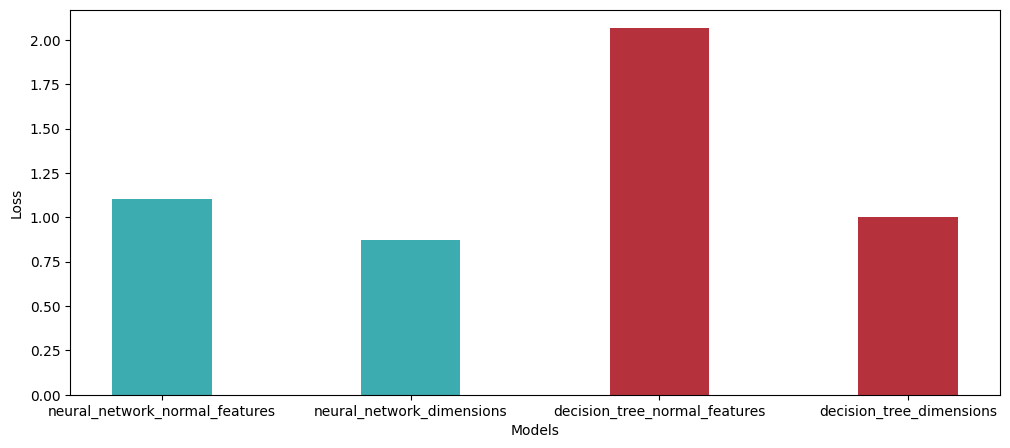

In [16]:
import matplotlib.pyplot as plt

# creating the dataset
data = {'neural_network_normal_features':NN_normal_features, 'neural_network_dimensions':NN_dimensions,
        'decision_tree_normal_features':DT_normal_features, 'decision_tree_dimensions':DT_dimensions}
x = list(data.keys())
y = list(data.values())
fig = plt.figure(figsize = (12, 5))
NN_col='#3cacb0'
DT_col='#b5313c'
plt.bar(x, y, color=[NN_col, NN_col, DT_col, DT_col], width = 0.4)

plt.xlabel("Models")
plt.ylabel("Loss")
plt.title("")
plt.show()

<div dir = "rtl" style="direction:rtl;line-height:250%;">
	<font face="XB Zar" size=5>
همانطور که مشاهده میکنید loss بعد از خوشه بندی در هر دو مدل کمتر شده است که دلیل آن میتواند جلوگیری از overfitting باشد
همجنشن همانطور که میبیند loss فیچر های اصلی با مدل کلاسیک بیشتر از مدل شبکه عصبی شده است چون شبکه های عصبی چند لایه اند و قدرت زیادی دارند این اتفاق برای حالتی که ویژگی ها را
dimension ها در نظر بگیریم نیز صادق است.
     </font>
</div>